### __Exploratory analysis of the dataset__

### __Classes:__
- 0: pedestrian
- 1: people
- 2: bicycle
- 3: car
- 4: van
- 5: truck
- 6: tricycle
- 7: awning-tricycle
- 8: bus
- 9: motor

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

In [14]:
# Celda 2: Explorar estructura
data_path = Path('../data')
print("Estructura del dataset:")
for item in data_path.rglob('*'):
    if item.is_file():
        pass
        #print(f"Archivo: {item}")
    else:
        print(f"Carpeta: {item}")

Estructura del dataset:
Carpeta: ..\data\VisDrone2019-DET-test-challenge
Carpeta: ..\data\VisDrone2019-DET-test-dev
Carpeta: ..\data\VisDrone2019-DET-train
Carpeta: ..\data\VisDrone2019-DET-val
Carpeta: ..\data\VisDrone2019-DET-test-challenge\images
Carpeta: ..\data\VisDrone2019-DET-test-dev\annotations
Carpeta: ..\data\VisDrone2019-DET-test-dev\images
Carpeta: ..\data\VisDrone2019-DET-test-dev\labels
Carpeta: ..\data\VisDrone2019-DET-train\annotations
Carpeta: ..\data\VisDrone2019-DET-train\images
Carpeta: ..\data\VisDrone2019-DET-train\labels
Carpeta: ..\data\VisDrone2019-DET-train\annotations
Carpeta: ..\data\VisDrone2019-DET-train\images
Carpeta: ..\data\VisDrone2019-DET-train\labels
Carpeta: ..\data\VisDrone2019-DET-val\annotations
Carpeta: ..\data\VisDrone2019-DET-val\images
Carpeta: ..\data\VisDrone2019-DET-val\labels
Carpeta: ..\data\VisDrone2019-DET-val\annotations
Carpeta: ..\data\VisDrone2019-DET-val\images
Carpeta: ..\data\VisDrone2019-DET-val\labels


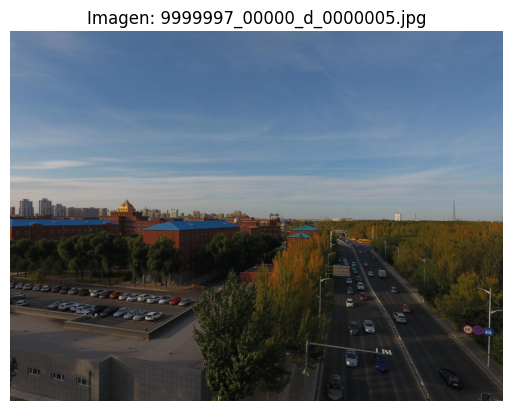

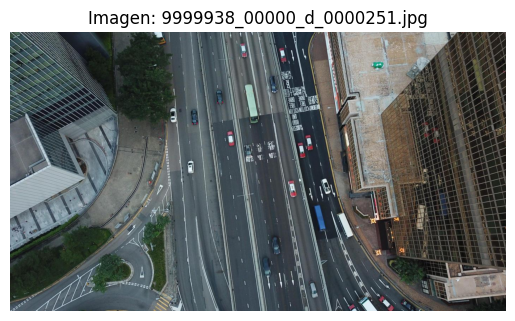

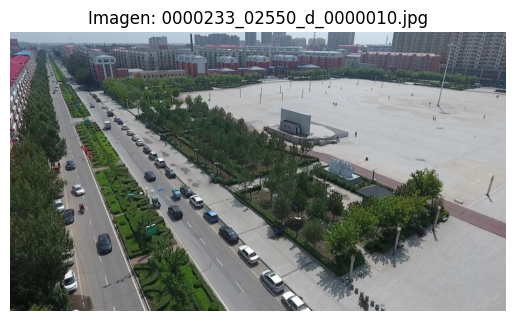

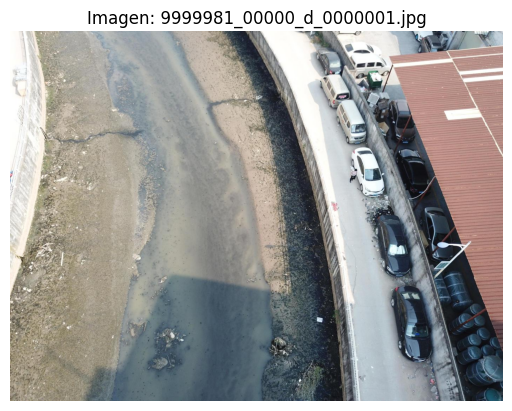

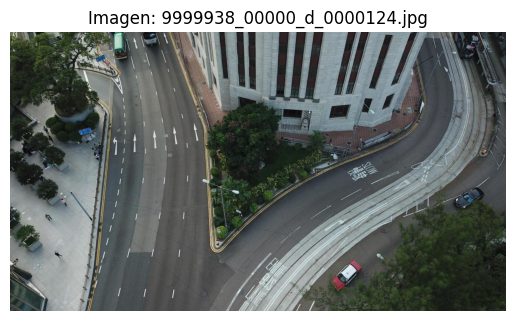

In [15]:
#Visualizar algunas imagenes seleccionadas al azar
image_files = list(data_path.glob('**/*.jpg'))
sample_images = np.random.choice(image_files, size=5, replace=False)
for img_path in sample_images:
    img = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Imagen: {img_path.name}")
    plt.axis('off')
    plt.show()

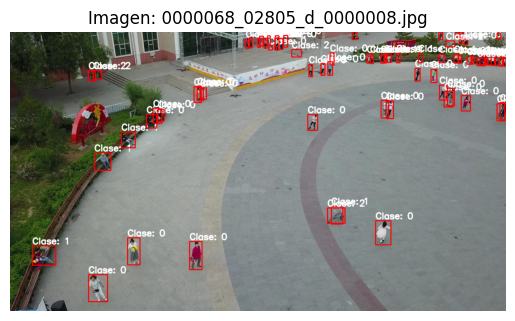

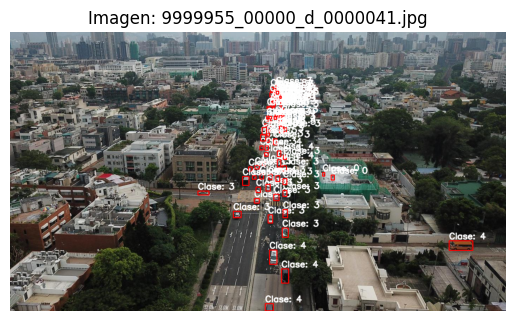

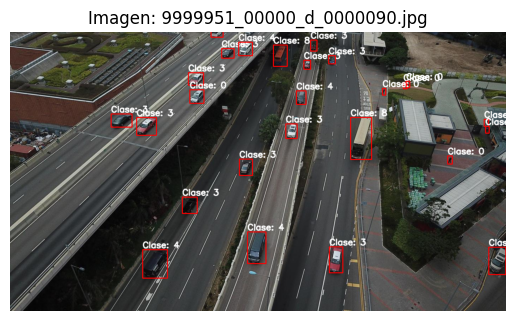

In [20]:
# Visualizar imágenes con anotaciones en formato YOLO usando OpenCV
import random

# Directorios de imágenes y labels (formato YOLO)
images_dir = data_path / 'VisDrone2019-DET-train' / 'images'
labels_dir = data_path / 'VisDrone2019-DET-train' / 'labels'

def load_yolo_labels(label_path, img_w, img_h):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            # Formato YOLO: class_id cx cy w h (valores normalizados)
            if len(parts) == 5:
                class_id, cx, cy, w, h = parts
                cx, cy, w, h = float(cx), float(cy), float(w), float(h)
                # Convertir a coordenadas absolutas
                x_min = int((cx - w/2) * img_w)
                y_min = int((cy - h/2) * img_h)
                x_max = int((cx + w/2) * img_w)
                y_max = int((cy + h/2) * img_h)
                boxes.append({
                    'x_min': x_min,
                    'y_min': y_min,
                    'x_max': x_max,
                    'y_max': y_max,
                    'class': int(class_id)
                })
    return boxes

# Listar imágenes disponibles
image_files = list(images_dir.glob('*.jpg'))
sample_images = random.sample(image_files, 3)

for img_path in sample_images:
    label_path = labels_dir / (img_path.stem + '.txt')
    if not label_path.exists():
        print(f"No se encontró label para {img_path.name}")
        continue
    img = cv2.imread(str(img_path))
    img_h, img_w = img.shape[:2]
    boxes = load_yolo_labels(label_path, img_w, img_h)
    for box in boxes:
        pt1 = (box['x_min'], box['y_min'])
        pt2 = (box['x_max'], box['y_max'])
        color = (0, 0, 255)  # Rojo en BGR
        cv2.rectangle(img, pt1, pt2, color, 2)
        label = f"Clase: {box['class']}"
        cv2.putText(img, label, (box['x_min'], box['y_min']-5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Imagen: {img_path.name}")
    plt.axis('off')
    plt.show()

In [27]:
# Explorar el balance de clases
labels_files = list(labels_dir.glob('*.txt'))
class_counts = {}
for label_file in labels_files:
    with open(label_file, 'r') as f:
        for line in f:
            class_id = int(line.split()[0])
            if class_id in class_counts:
                class_counts[class_id] += 1
            else:
                class_counts[class_id] = 1

# Mostrar el balance de clases
classes = list(class_counts.keys())
counts = list(class_counts.values())
for cl,co in zip(classes, counts):
    print(f"Class: {cl} | Counts: {co}")

Class: 3 | Counts: 144867
Class: 1 | Counts: 27059
Class: 4 | Counts: 24956
Class: 5 | Counts: 12875
Class: 9 | Counts: 29647
Class: 2 | Counts: 10480
Class: 6 | Counts: 4812
Class: 7 | Counts: 3246
Class: 0 | Counts: 79337
Class: 8 | Counts: 5926
